In [1]:
import pandas as pd
from datetime import timedelta
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [9]:
df = pd.read_excel("database-world-2022.xlsx")

In [10]:
df

,customer,recency,frequency,monetary,country
0,27 SARL,141,3,1063.0200,fr
1,3B PISCINE SARL,143,2,4144.3000,fr
2,3D LINER,17,1,233.3600,fr
3,A DEUX PLUS - ENTREPRENDRE,337,1,48.1800,fr
4,A ET P,336,1,107.0400,fr
...,...,...,...,...,...
2327,TEST FCE 6,23,25,120076.6195,es
2328,TIENDA-PISCINAS SL,2,130,34404.5170,es
2329,TU PISCINA EN CASA SL,1,28,46786.1524,es
2330,UNION COPIMAR SL,38,4,52137.6910,es


In [11]:
df2 = df

In [12]:
rfm=df2[['recency','frequency','monetary']]
rfm.index = df2["customer"]
rfm

,recency,frequency,monetary
customer,,,
27 SARL,141,3,1063.0200
3B PISCINE SARL,143,2,4144.3000
3D LINER,17,1,233.3600
A DEUX PLUS - ENTREPRENDRE,337,1,48.1800
A ET P,336,1,107.0400
...,...,...,...
TEST FCE 6,23,25,120076.6195
TIENDA-PISCINAS SL,2,130,34404.5170
TU PISCINA EN CASA SL,1,28,46786.1524


# RFM Scoring

In [13]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['score']= rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)
rfm['score'] = pd.to_numeric(rfm['score'])

C:\Users\juanv\AppData\Local\Temp\ipykernel_16316\101564504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])


In [14]:
pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1], retbins=True)

(customer
 27 SARL                        2
 3B PISCINE SARL                2
 3D LINER                       5
 A DEUX  PLUS - ENTREPRENDRE    1
 A ET P                         1
                               ..
 TEST FCE 6                     4
 TIENDA-PISCINAS  SL            5
 TU PISCINA EN CASA SL          5
 UNION COPIMAR SL               4
 VECOBAY SL                     4
 Name: recency, Length: 2332, dtype: category
 Categories (5, int64): [5 < 4 < 3 < 2 < 1],
 array([  1.,  22.,  62., 128., 192., 519.]))

In [15]:
pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5], retbins=True)[1]

array([1.0000e+00, 4.6720e+02, 9.3340e+02, 1.3996e+03, 1.8658e+03,
       2.3320e+03])

In [16]:
pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5], retbins=True)[1]

array([-1.95226000e+03,  4.28164000e+02,  1.20619000e+03,  3.08740004e+03,
        9.86829800e+03,  6.82667987e+05])

In [17]:
segment_dictionary = {"Champion TOP": [555, 545, 554],
                      "Growing Champion": [544, 454, 455, 445],
                      "Loyal Customer": [543,444,435,355,354,345,344,335],
                      "Potential Loyalist": [553,551,552,541,542,533,532,531,452,451,442,441,431,453,433,432,423,353,352,351,342,341,333,323],
                      "New Customer": [512,511,422,421,412,411,311],
                      "Promising": [525,524,523,522,521,515,514,513,425,424,413,414,415,315,314,313],
                      "Need Attention": [535,534,443,434,343,334,325,324],
                      "Cannot Lose Them": [155,154,144,214,215,115,114,113],
                      "About To Sleep": [331,321,312,221,213],
                      "At Risk": [255,254,245,244,253,252,243,242,235,234,225,224,153,152,145,143,142,135,134,133,125,124],
                      "Hibernating": [332,322,231,241,251,233,232,223,222,132,123,122,212,211],
                      "Lost": [111,112,121,131,141,151]
                      }

def rfm_segment(score):
    for k, v in segment_dictionary.items():
        if score in v:
            return k


In [18]:
rfm['segment'] = rfm['score'].apply(lambda score : rfm_segment(score))
rfm['cluster'] = 3
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,segment,cluster
customer,,,,,,,,,
27 SARL,141,3,1063.02,2,3,2,232,Hibernating,3
3B PISCINE SARL,143,2,4144.30,2,2,4,224,At Risk,3
3D LINER,17,1,233.36,5,1,1,511,New Customer,3
A DEUX PLUS - ENTREPRENDRE,337,1,48.18,1,1,1,111,Lost,3
A ET P,336,1,107.04,1,1,1,111,Lost,3


<Figure size 20000x20000 with 0 Axes>

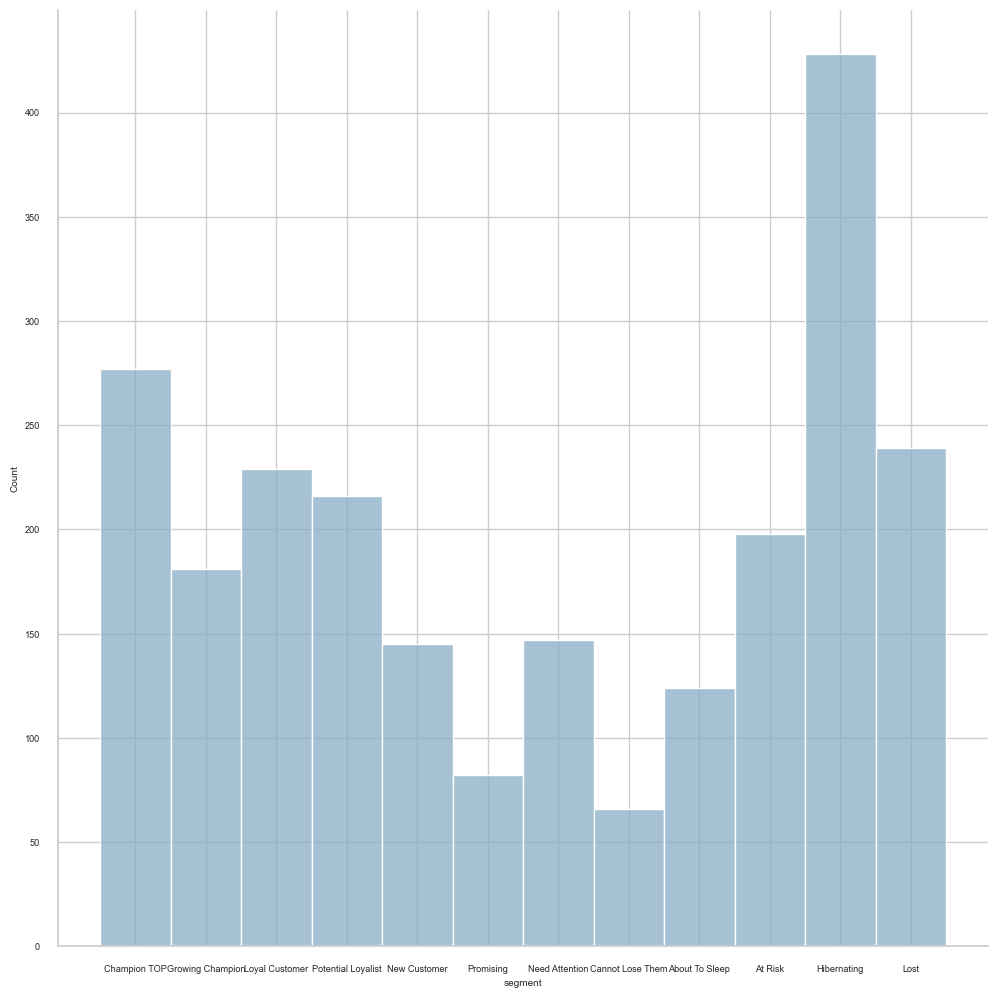

In [19]:
rfm['segment'] = pd.Categorical(rfm['segment'], categories=segment_dictionary.keys())

plt.figure(figsize=(200,200))
sns.set_context("notebook", font_scale=0.6)
sns.set_palette('twilight')
sns.displot(rfm['segment'], height=10)

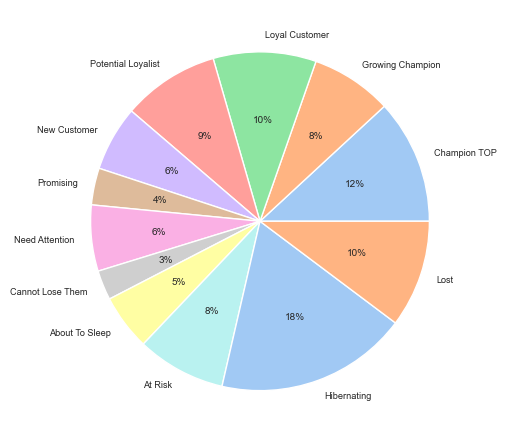

In [20]:
colors = sns.color_palette("pastel", n_colors=12)
plt.pie(rfm.groupby('segment').size(),labels=rfm.groupby('segment').size().index, colors = colors, autopct='%.0f%%')
plt.show()

In [21]:
rfm.groupby('segment').agg({
    'recency' : ['mean', 'min','max'],
    'frequency' : ['mean', 'min','max'],
    'monetary' : ['mean','min','max','count']
})

recency            frequency                monetary  \
                          mean  min  max       mean min   max          mean   
segment                                                                       
Champion TOP          9.198556    1   22  53.371841   4  2329  42424.555768   
Growing Champion     31.790055    2   62  19.591160   4   110  21458.904428   
Loyal Customer       70.139738    1  128  10.449782   2    90   9646.434667   
Potential Loyalist   53.162037    1  128   4.375000   1    27   1516.817190   
New Customer         49.772414    1  126   1.186207   1     2    371.079645   
Promising            25.609756    1  113   1.304878   1     2   5789.134361   
Need Attention       62.408163    3  128   4.401361   2    10   6036.400880   
Cannot Lose Them    271.257576  176  519   1.560606   1     8  12586.324394   
About To Sleep      130.338710   63  192   1.451613   1     4    407.613768   
At Risk             177.621212  129  349   6.222222   1   106   6234.657323   
Hibernating         171.913551   63  351   1.904206   1     4    921.944227   
Lost                256.004184  193  380   1.213389   1     6    302.093096   

                                                  
                          min          max count  
segment                                           
Champion TOP        3184.3724  682667.9873   277  
Growing Champion    3088.7734  226794.1904   181  
Loyal Customer      1258.5700  124937.4329   229  
Potential Loyalist    53.0400    3084.0800   216  
New Customer        -383.2200    1183.1500   145  
Promising            156.7700   22013.4086    82  
Need Attention      1224.3195   46984.3025   147  
Cannot Lose Them    1209.9100  519000.0000    66  
About To Sleep         0.0000    2295.0700   124  
At Risk              460.7600  121735.2000   198  
Hibernating          -14.3400    3039.3300   428  
Lost               -1952.2600    1196.4300   239

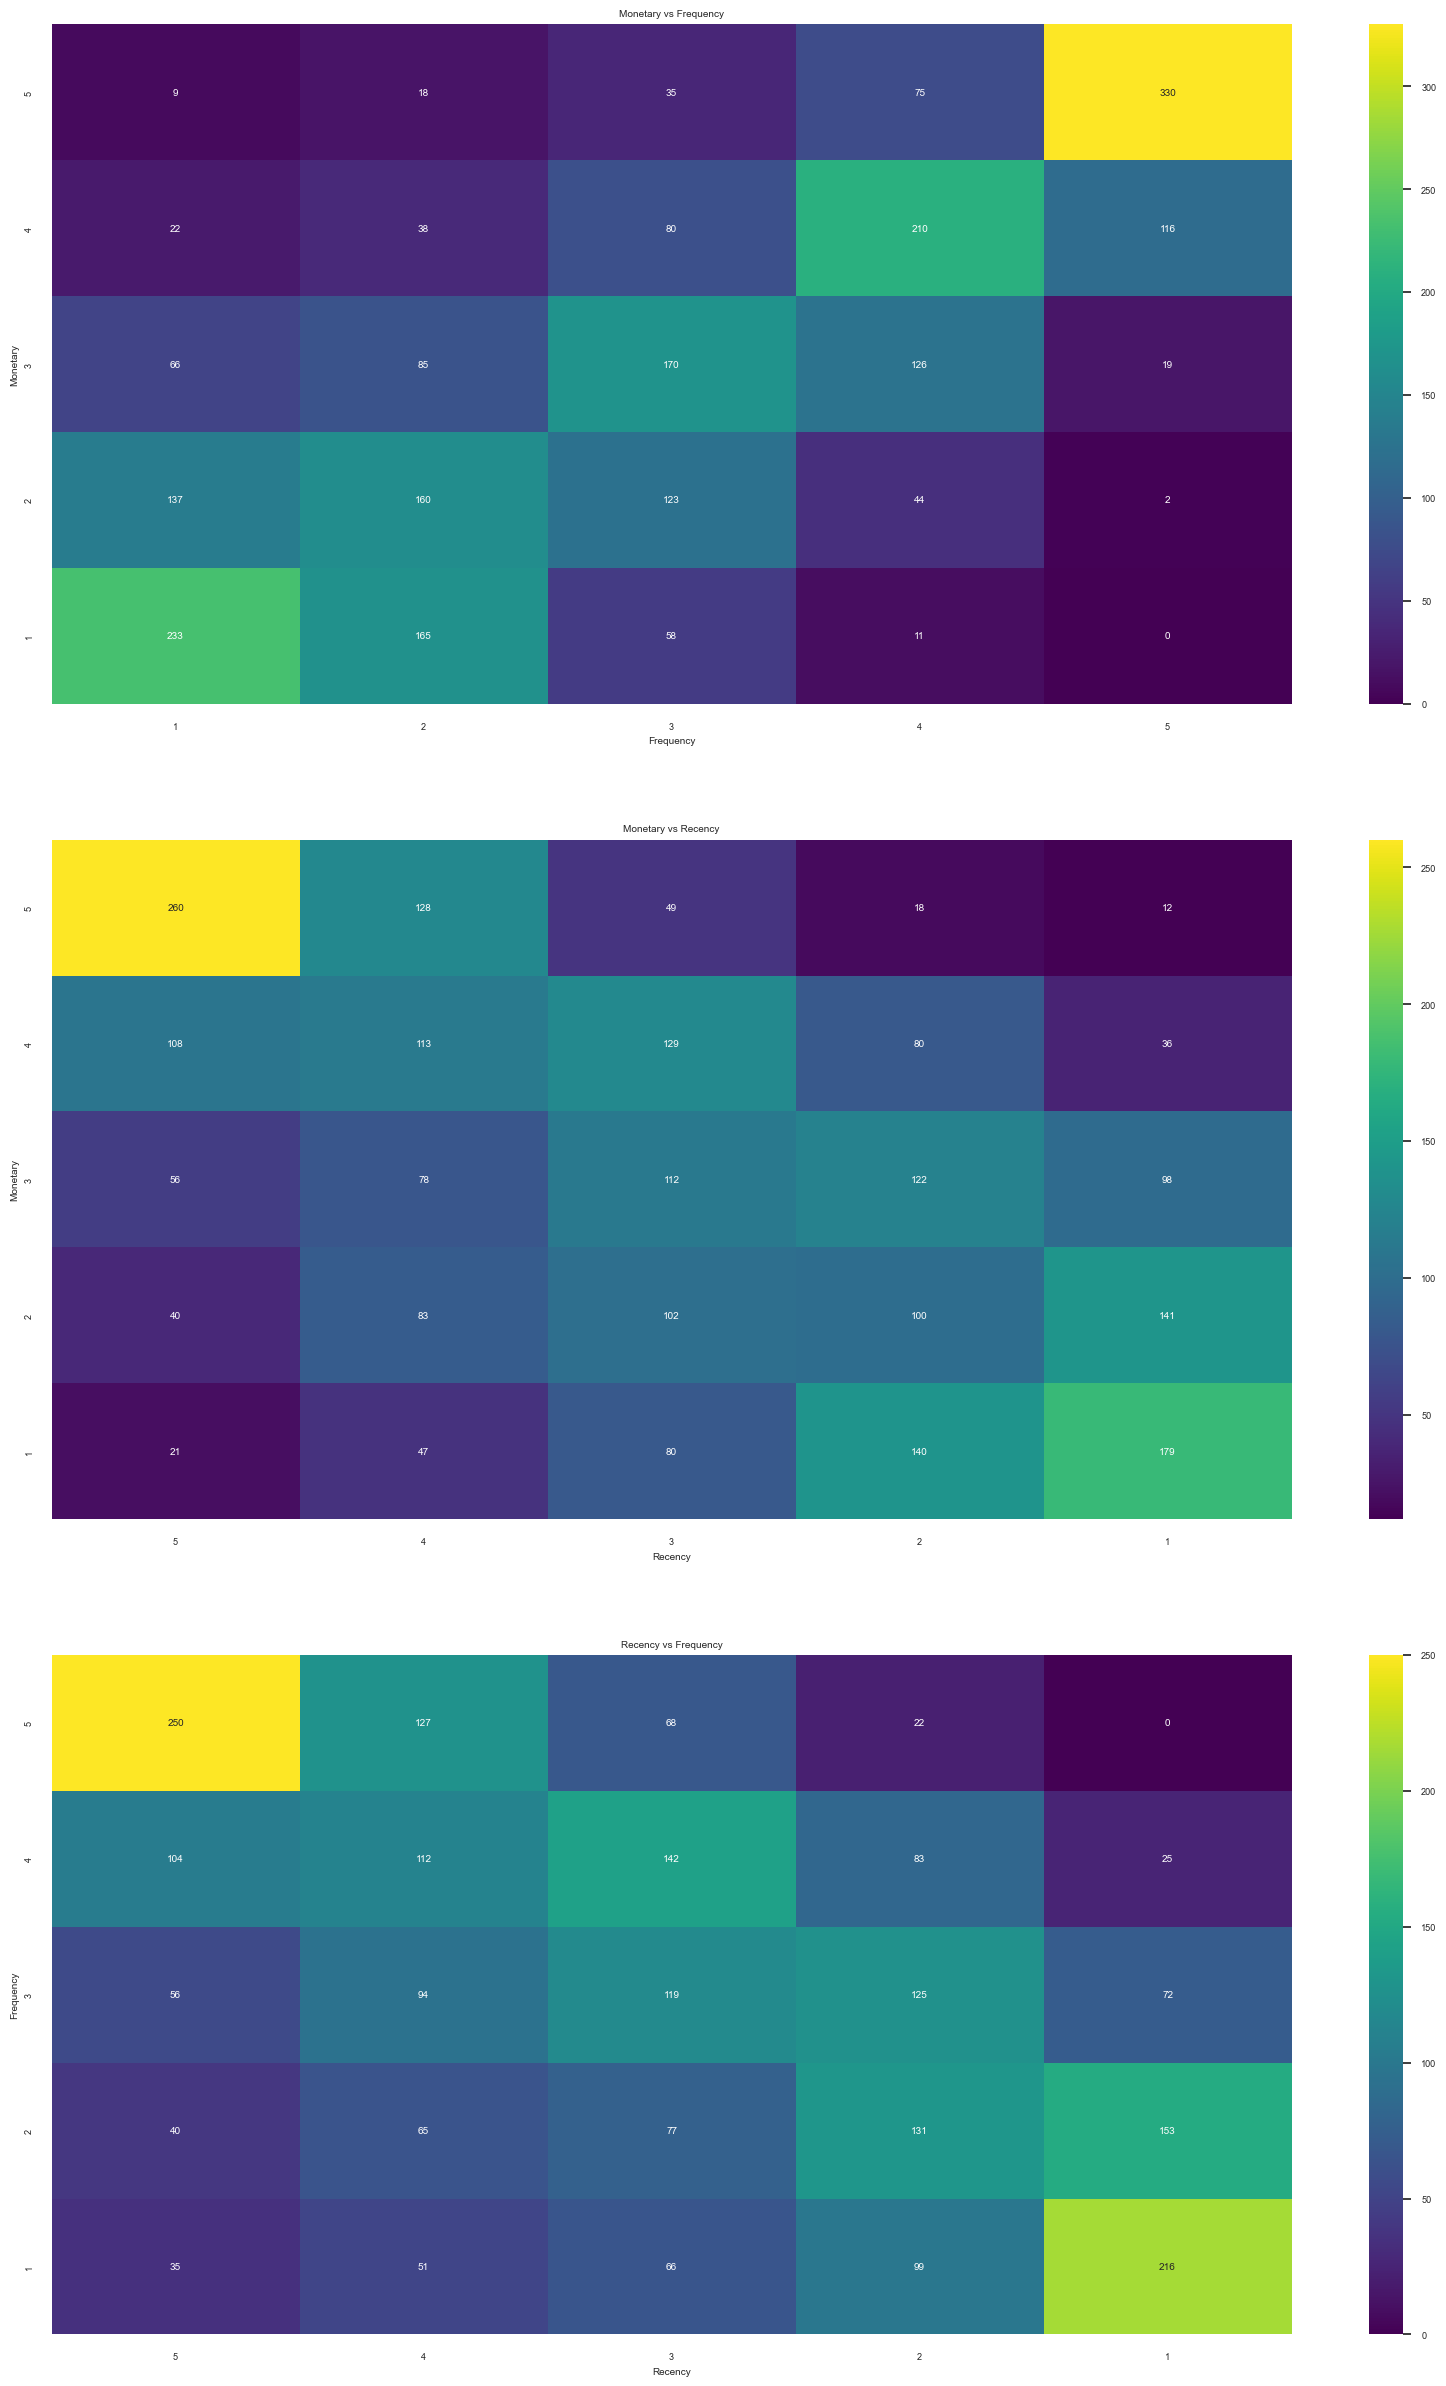

In [23]:
cross_table1 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['frequency_score'])
cross_table2 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['recency_score'])
cross_table3 = pd.crosstab(index=rfm['frequency_score'], columns=rfm['recency_score'])
plt.figure(figsize=(20,30))
plt.subplot(311)
ax1 = sns.heatmap(cross_table1, cmap='viridis', annot=True, fmt=".0f")
ax1.invert_yaxis()
ax1.set_ylabel('Monetary')
ax1.set_xlabel('Frequency')
ax1.set_title('Monetary vs Frequency')
plt.subplot(312)
ax2 = sns.heatmap(cross_table2, cmap='viridis', annot=True, fmt=".0f")
ax2.invert_yaxis()
ax2.set_ylabel('Monetary')
ax2.set_xlabel('Recency')
ax2.set_title('Monetary vs Recency')
plt.subplot(313)
ax3 = sns.heatmap(cross_table3, cmap='viridis', annot=True, fmt=".0f")
ax3.invert_yaxis()
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Recency')
ax3.set_title('Recency vs Frequency')
plt.show()

# K Means

## Outliers


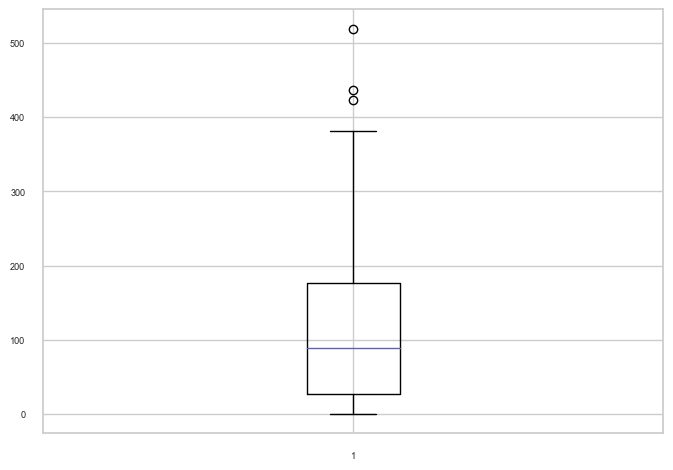

In [24]:
rfm1 = rfm
plt.boxplot(rfm1.recency)
Q1 = rfm1.recency.quantile(0.25)
Q3 = rfm1.recency.quantile(0.75)
IQR = Q3 - Q1
rfm1 = rfm1[(rfm1.recency >= Q1 - 3*IQR) & (rfm1.recency <= Q3 + 3*IQR)]

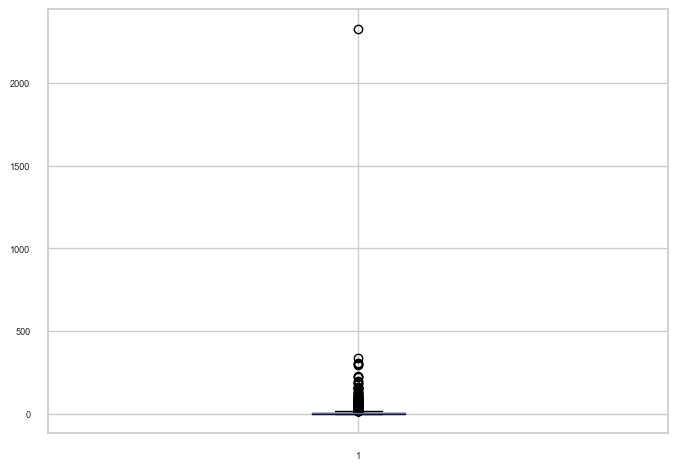

In [25]:
plt.boxplot(rfm1.frequency)
Q1 = rfm1.frequency.quantile(0.25)
Q3 = rfm1.frequency.quantile(0.75)
IQR = Q3 - Q1
rfm1 = rfm1[(rfm1.frequency >= Q1 - 3*IQR) & (rfm1.frequency <= Q3 + 3*IQR)]


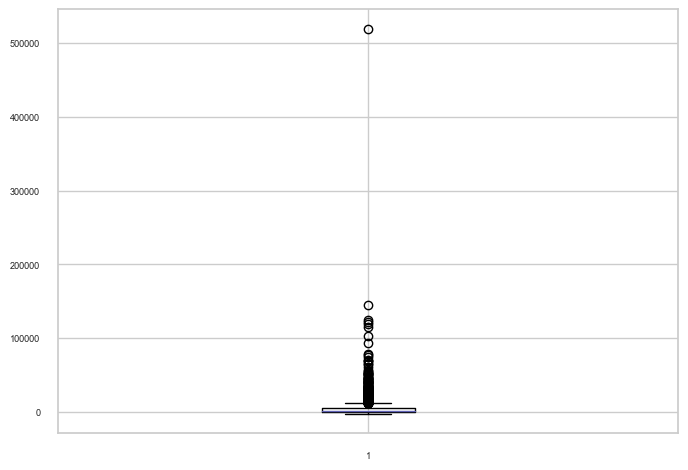

In [26]:
plt.boxplot(rfm1.monetary)
Q1 = rfm1.monetary.quantile(0.25)
Q3 = rfm1.monetary.quantile(0.75)
IQR = Q3 - Q1
rfm1 = rfm1[(rfm1.monetary >= (Q1 - 3*IQR)) & (rfm1.monetary <= (Q3 + 3*IQR))]

In [27]:
rfm2=rfm1[['recency','frequency','monetary']]

In [28]:
scaler = StandardScaler()
x_scaled=scaler.fit(rfm2)
x_scaled=scaler.fit_transform(rfm2)

## Clusters
We will use the elbow method to determine the optimal amount of clusters. If we pick more clusters than necessary the added clusters will not be more descriptive of the data and will increase the amount of distortion. Some clusters will also be very small.

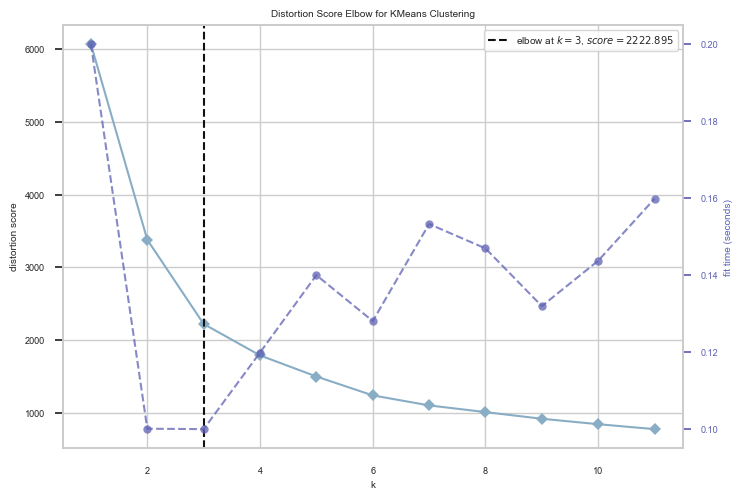

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)
visualizer.show()

In [30]:
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm2)
clusters_scaled = rfm2.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

In [31]:
rfm2['cluster']= clusters_scaled['cluster_pred']
rfm2['segment']= rfm1['segment']

C:\Users\juanv\AppData\Local\Temp\ipykernel_16316\2804094801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2['cluster']= clusters_scaled['cluster_pred']
C:\Users\juanv\AppData\Local\Temp\ipykernel_16316\2804094801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2['segment']= rfm1['segment']


In [32]:
rfm2 = pd.concat([rfm2,rfm[["recency", "frequency", "monetary", "cluster", "segment"]]]).reset_index().drop_duplicates(subset='customer', keep='first').set_index('customer')
rfm2[["recency_score", "frequency_score", "monetary_score", "score"]] = rfm[["recency_score", "frequency_score", "monetary_score", "score"]]

[2 0 2 ... 0 0 2]
 Our cluster centers are as follows
[[ 1.04765852 -0.53311606 -0.47857447]
 [-0.79012972  1.64173185  1.77602716]
 [-0.60892943 -0.1498801  -0.24664132]]


,recency,frequency,monetary,segment,recency_score,frequency_score,monetary_score,score
cluster,,,,,,,,
0,778,778,778,778,778,778,778,778
1,336,336,336,336,336,336,336,336
2,908,908,908,908,908,908,908,908
3,310,310,310,310,310,310,310,310


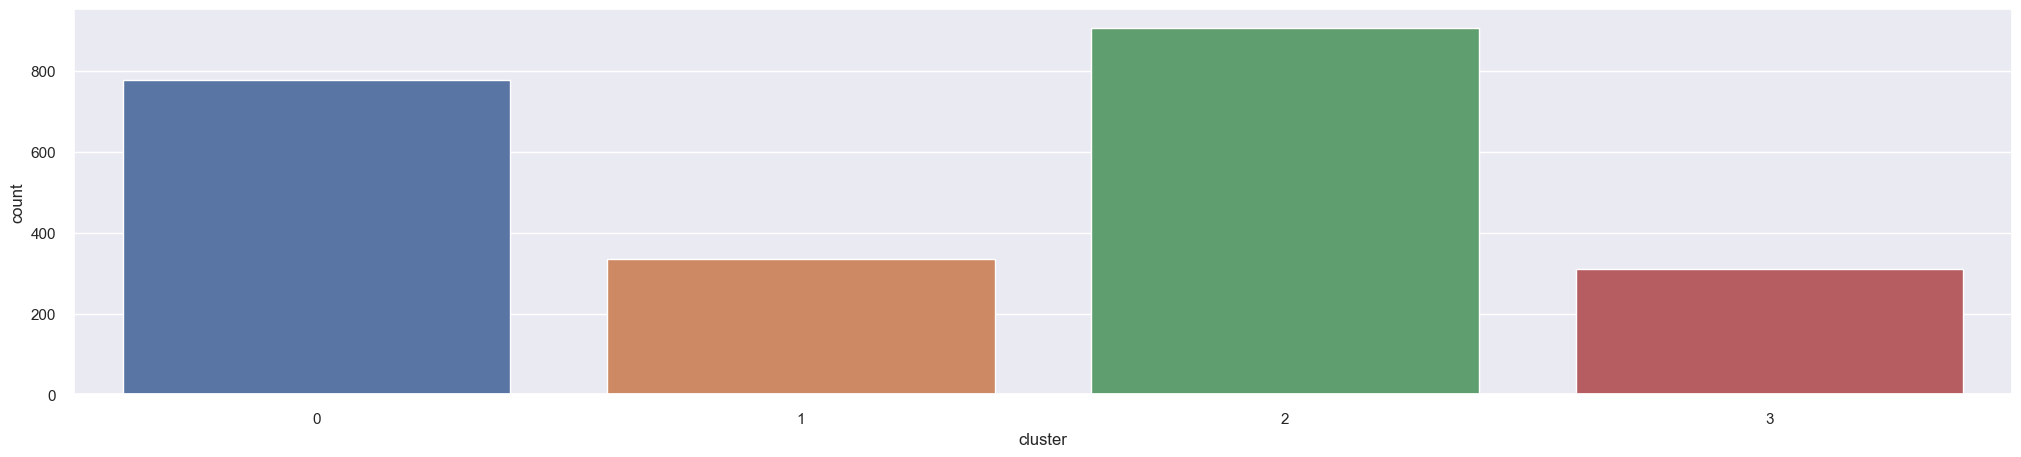

In [33]:
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster", data=rfm2)
rfm2.groupby(['cluster']).count()

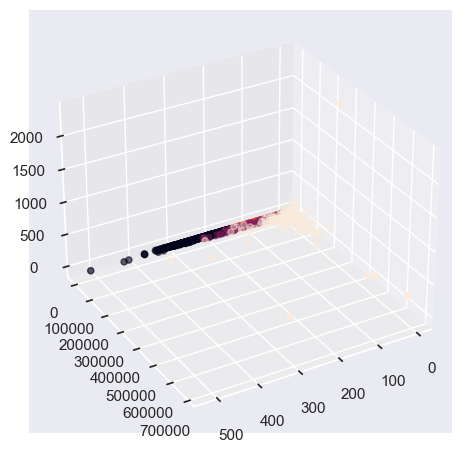

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=rfm2['recency']
yline=rfm2['frequency']
zline=rfm2['monetary']

ax.scatter3D(xline, zline,yline,c=rfm2['cluster'])
ax.view_init(30, 60)

# Data Description

In [35]:
segment_df = rfm2.groupby('segment').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
segment_df

recency            frequency                monetary  \
                          mean  min  max       mean min   max          mean   
segment                                                                       
Champion TOP          9.198556    1   22  53.371841   4  2329  42424.555768   
Growing Champion     31.790055    2   62  19.591160   4   110  21458.904428   
Loyal Customer       70.139738    1  128  10.449782   2    90   9646.434667   
Potential Loyalist   53.162037    1  128   4.375000   1    27   1516.817190   
New Customer         49.772414    1  126   1.186207   1     2    371.079645   
Promising            25.609756    1  113   1.304878   1     2   5789.134361   
Need Attention       62.408163    3  128   4.401361   2    10   6036.400880   
Cannot Lose Them    271.257576  176  519   1.560606   1     8  12586.324394   
About To Sleep      130.338710   63  192   1.451613   1     4    407.613768   
At Risk             177.621212  129  349   6.222222   1   106   6234.657323   
Hibernating         171.913551   63  351   1.904206   1     4    921.944227   
Lost                256.004184  193  380   1.213389   1     6    302.093096   

                                                  
                          min          max count  
segment                                           
Champion TOP        3184.3724  682667.9873   277  
Growing Champion    3088.7734  226794.1904   181  
Loyal Customer      1258.5700  124937.4329   229  
Potential Loyalist    53.0400    3084.0800   216  
New Customer        -383.2200    1183.1500   145  
Promising            156.7700   22013.4086    82  
Need Attention      1224.3195   46984.3025   147  
Cannot Lose Them    1209.9100  519000.0000    66  
About To Sleep         0.0000    2295.0700   124  
At Risk              460.7600  121735.2000   198  
Hibernating          -14.3400    3039.3300   428  
Lost               -1952.2600    1196.4300   239

In [36]:
subgroup_df = rfm2.groupby(['cluster','segment']).agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
subgroup_df

recency                frequency                \
                                  mean    min    max       mean   min     max   
cluster segment                                                                 
0       Champion TOP               NaN    NaN    NaN        NaN   NaN     NaN   
        Growing Champion           NaN    NaN    NaN        NaN   NaN     NaN   
        Loyal Customer             NaN    NaN    NaN        NaN   NaN     NaN   
        Potential Loyalist         NaN    NaN    NaN        NaN   NaN     NaN   
        New Customer               NaN    NaN    NaN        NaN   NaN     NaN   
        Promising                  NaN    NaN    NaN        NaN   NaN     NaN   
        Need Attention             NaN    NaN    NaN        NaN   NaN     NaN   
        Cannot Lose Them    272.129032  176.0  519.0   1.500000   1.0     8.0   
        About To Sleep      165.322034  135.0  192.0   1.254237   1.0     2.0   
        At Risk             205.166667  147.0  349.0   3.562500   1.0    10.0   
        Hibernating         192.909938  133.0  351.0   1.748447   1.0     4.0   
        Lost                256.004184  193.0  380.0   1.213389   1.0     6.0   
1       Champion TOP         11.953488    1.0   22.0  14.500000   4.0    29.0   
        Growing Champion     35.266667    2.0   62.0  13.853333   5.0    29.0   
        Loyal Customer       76.442308   23.0  128.0  11.009615   2.0    26.0   
        Potential Loyalist   19.500000    2.0   49.0  16.000000  12.0    27.0   
        New Customer               NaN    NaN    NaN        NaN   NaN     NaN   
        Promising            16.333333    1.0   38.0   1.133333   1.0     2.0   
        Need Attention       18.461538    3.0   73.0   2.692308   2.0     4.0   
        Cannot Lose Them    230.000000  230.0  230.0   7.000000   7.0     7.0   
        About To Sleep             NaN    NaN    NaN        NaN   NaN     NaN   
        At Risk             163.593750  135.0  231.0  10.500000   3.0    25.0   
        Hibernating                NaN    NaN    NaN        NaN   NaN     NaN   
        Lost                       NaN    NaN    NaN        NaN   NaN     NaN   
2       Champion TOP          1.000000    1.0    1.0  11.000000  11.0    11.0   
        Growing Champion     12.300000    2.0   22.0   6.700000   4.0    10.0   
        Loyal Customer       62.708738    1.0  123.0   6.368932   4.0    11.0   
        Potential Loyalist   54.796117    1.0  128.0   3.810680   1.0    13.0   
        New Customer         49.772414    1.0  126.0   1.186207   1.0     2.0   
        Promising            28.046875    1.0  113.0   1.359375   1.0     2.0   
        Need Attention       70.632000    4.0  128.0   4.720000   2.0    10.0   
        Cannot Lose Them           NaN    NaN    NaN        NaN   NaN     NaN   
        About To Sleep       98.584615   63.0  136.0   1.630769   1.0     4.0   
        At Risk             144.317460  129.0  179.0   5.476190   2.0    12.0   
        Hibernating         108.132075   63.0  149.0   2.377358   1.0     4.0   
        Lost                       NaN    NaN    NaN        NaN   NaN     NaN   
3       Champion TOP          7.994737    1.0   22.0  71.189474   4.0  2329.0   
        Growing Champion     36.052632   23.0   60.0  30.342105   4.0   110.0   
        Loyal Customer       75.136364   24.0  128.0  26.909091   2.0    90.0   
        Potential Loyalist         NaN    NaN    NaN        NaN   NaN     NaN   
        New Customer               NaN    NaN    NaN        NaN   NaN     NaN   
        Promising            20.000000   17.0   25.0   1.000000   1.0     1.0   
        Need Attention       11.666667    3.0   22.0   2.444444   2.0     3.0   
        Cannot Lose Them    267.000000  227.0  343.0   1.000000   1.0     1.0   
        About To Sleep             NaN    NaN    NaN        NaN   NaN     NaN   
        At Risk             163.714286  136.0  255.0  29.857143   1.0   106.0   
        Hibernating                NaN    NaN    NaN        Na

In [37]:
df5 = rfm2.groupby('cluster').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
df5

recency            frequency                monetary             \
               mean  min  max       mean min   max          mean        min   
cluster                                                                       
0        218.025707  133  519   1.750643   1    10   1187.627949 -1952.2600   
1         52.880952    1  231  11.863095   1    29  10070.700816  1442.2800   
2         69.295154    1  179   3.529736   1    13   2098.230801  -383.2200   
3         25.883871    1  343  53.745161   1  2329  51476.673090  4011.5139   

                            
                 max count  
cluster                     
0         13198.1200   778  
1         18893.1900   336  
2         10430.1518   908  
3        682667.9873   310

In [38]:
score_df = rfm2.groupby('score').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
score_df

recency            frequency                 monetary              \
             mean  min  max       mean min   max           mean         min   
score                                                                         
111    264.717172  195  380   1.000000   1     1     166.007172   -496.5100   
112    255.900000  193  346   1.000000   1     1     715.614167    432.2100   
113    269.184211  198  380   1.000000   1     1    1772.807368   1209.9100   
114    293.733333  193  519   1.000000   1     1    5926.310000   3330.4000   
115    309.250000  227  436   1.000000   1     1  156767.625000  10071.7700   
...           ...  ...  ...        ...  ..   ...            ...         ...   
545     11.594595    1   22   5.972973   4    10   28377.767781   9921.6313   
552     10.000000    3   17  12.000000  12    12    1062.918600    972.4500   
553     10.875000    2   21  16.125000  11    27    2374.150312   1442.2800   
554     10.940000    1   22  19.100000  11    88    6453.605564   3184.3724   
555      8.273684    1   22  71.621053  10  2329   54626.022429   9945.3144   

                          
               max count  
score                     
111       424.3200    99  
112      1196.4300    60  
113      2970.0900    38  
114      9682.7700    15  
115    519000.0000     4  
...            ...   ...  
545    115318.4463    37  
552      1153.3872     2  
553      3033.7233     8  
554      9674.8748    50  
555    682667.9873   190  

[107 rows x 10 columns]

In [40]:
country_df = df2.groupby('country').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
country_df

recency           frequency                monetary           \
               mean min  max       mean min   max          mean      min   
country                                                                    
es        99.175318   1  332  16.529873   1  2329  15163.094097     4.29   
fr       126.897881   1  519   4.289017   1    63   4085.609971 -1952.26   
uk        92.886447   1  347  14.230769   1   296   8968.168571  -383.22   

                            
                 max count  
country                     
es       682667.9873  1021  
fr       519000.0000  1038  
uk       200733.7700   273

In [42]:
rfm2.to_excel("database-world-2022.xlsx")
df5.to_excel("cluster-explanation-world-2022.xlsx")
subgroup_df.to_excel("clusternsegment-explanation-world-2022.xlsx")
segment_df.to_excel("segment-explanation-world-2022.xlsx")
score_df.to_excel("score-explanation-world-2022.xlsx")
country_df.to_excel("country-explanation-world-2022.xlsx")

